In [48]:
df1 = pd.read_csv('reviews.csv',sep='|')

In [49]:
df1

,label,text
0,positive,Great CD: My lovely Pat has one of the GREAT v...
1,positive,One of the best game music soundtracks - for a...
2,negative,Batteries died within a year ...: I bought thi...
3,positive,"works fine, but Maha Energy is better: Check o..."
4,positive,Great for the non-audiophile: Reviewed quite a...
5,negative,DVD Player crapped out after one year: I also ...
6,negative,"Incorrect Disc: I love the style of this, but ..."
7,negative,DVD menu select problems: I cannot scroll thro...
8,positive,Unique Weird Orientalia from the 1930's: Exoti...
9,negative,"Not an ""ultimate guide"": Firstly,I enjoyed the..."


In [6]:
import pandas as pd;
df = pd.read_csv('reviews.csv',sep='|')
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

import string 


def remove_punctuations(text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

#df['text'] = df['text'].apply(remove_punctuations) #remove punctuations
#df['text'] = df['text'].str.replace('\d+', '') #remove nums
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df.label[df['label'] == "negative"] = 0
df.label[df['label'] == "positive"] = 1
y = df['label']
y = y.astype('int')
test = df['text']

from sklearn.externals import joblib
vectorizer = joblib.load('vectortest2.sav')
#len(bow_transformer.vocabulary_)

testdata=df.iloc[4::5, :]

Xtest = testdata['text']
y_test = testdata['label']

traindata = df.drop(testdata.index)
Xtrain = traindata['text']
y_train = traindata['label']

X_train = vectorizer.transform(Xtrain)
X_test = vectorizer.transform(Xtest)

y_train=y_train.astype('int')
y_test=y_test.astype('int')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nihagajam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
df

,label,text
0,1,Great CD: My lovely Pat one GREAT voices gener...
1,1,One best game music soundtracks - game I reall...
2,0,Batteries died within year ...: I bought charg...
3,1,"works fine, Maha Energy better: Check Maha Ene..."
4,1,Great non-audiophile: Reviewed quite bit combo...
5,0,DVD Player crapped one year: I also began inco...
6,0,"Incorrect Disc: I love style this, couple year..."
7,0,DVD menu select problems: I cannot scroll DVD ...
8,1,Unique Weird Orientalia 1930's: Exotic tales O...
9,0,"Not ""ultimate guide"": Firstly,I enjoyed format..."


In [7]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(6, 6), random_state=1)
clf.fit(X_train, y_train)  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(6, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [19]:
predictions = clf.predict(X_test)
score = clf.score(X_test, y_test)
print(score)

0.8506757348069062


In [20]:

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[33774  6200]
 [ 5744 34269]]


             precision    recall  f1-score   support

          0       0.85      0.84      0.85     39974
          1       0.85      0.86      0.85     40013

avg / total       0.85      0.85      0.85     79987



In [9]:
from sklearn.externals import joblib
saved_model = 'NeuralNetworkModel.sav'
joblib.dump(clf,saved_model)

['NeuralNetworkModel.sav']

In [25]:
# Compute ROC curve and ROC area for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_score = joblib.load('NeuralNetworkModel.sav').predict(X_test)

In [35]:
y_score

array([1, 1, 0, ..., 0, 1, 1])

In [21]:
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
    

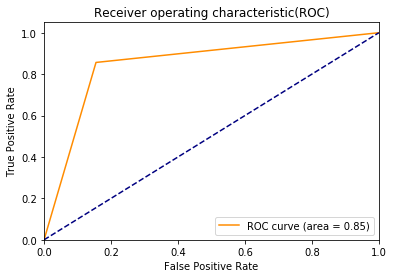

In [18]:
#print roc_auc_score(y_test, y_score)
plt.figure()
#plt.plot(fpr[0], tpr[0],color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()

In [42]:
y_proba = joblib.load('NeuralNetworkModel.sav').predict_proba(X_test) 

In [43]:
import matplotlib.pyplot as plt
fpr= dict()
tpr = dict()
roc_auc = dict()

for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_proba[:,i],pos_label=1)
    roc_auc[i] = auc(fpr[i], tpr[i])

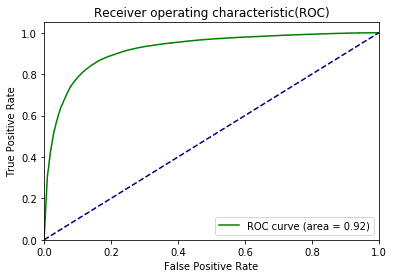

In [46]:
#print roc_auc_score(y_test, y_score)
plt.figure()
#plt.plot(fpr[0], tpr[0],color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1],color='green',label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(ROC)')
plt.legend(loc="lower right")
plt.show()